# Neurona binaria
La neurona va a hacer la clasificación de dos clases.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras import models
from keras import layers
from keras import optimizers
from sklearn.model_selection import train_test_split
from keras.losses import BinaryCrossentropy
from keras.models  import load_model

In [2]:
#clases
pd.read_csv('dosClases.txt')

,X1,X2,X3,C
0,6.204641,-0.024561,-4.980299,0
1,6.247755,0.359347,-4.772096,0
2,6.645913,1.040957,-5.033993,0
3,5.897285,0.403239,-5.146077,0
4,6.115612,0.379084,-4.932085,0
...,...,...,...,...
95,7.317368,-9.151487,2.049955,1
96,7.430222,-7.246285,2.042773,1
97,8.632408,-6.921499,3.007982,1
98,7.860009,-6.589495,1.829776,1


In [3]:
#separamos las caracaterísticas y las etiquetas
features=pd.read_csv('dosClases.txt').to_numpy()[:,:3]
clases=pd.read_csv('dosClases.txt').to_numpy()[:,3]

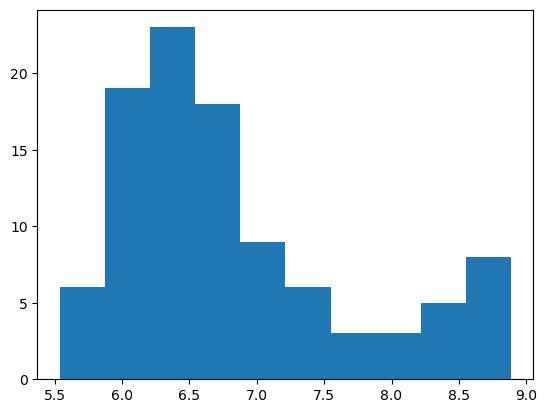

In [4]:
plt.hist(features[:,0]);

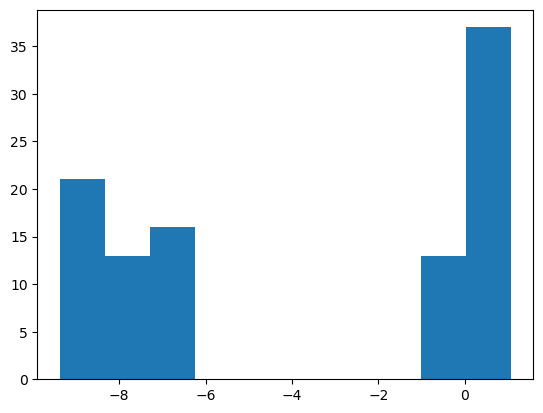

In [5]:
plt.hist(features[:,1]);

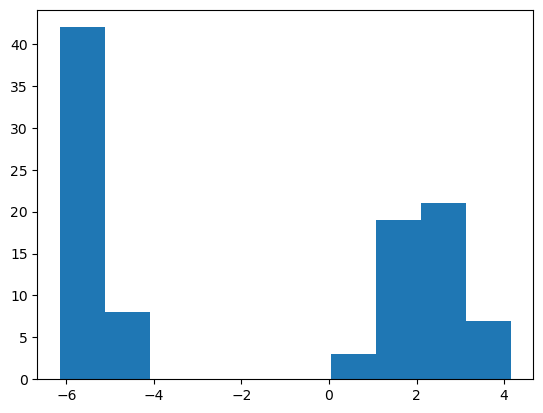

In [6]:
plt.hist(features[:,2]);

Vamos a reservar un conjunto para probar hasta el final

In [7]:
X_learn, X_test, y_learn, y_test = train_test_split(features, clases, test_size=0.33)

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_learn, y_learn, test_size=0.33)

Para hacer la clasificación binaria vamos a utilizar la arquitectura de red mostrada arriba, con la función de activación sigmoide

Epoch 1/100
2/2 [==============================] - 1s 403ms/step - loss: 0.2017 - accuracy: 0.9489 - val_loss: 0.1329 - val_accuracy: 1.0000
Epoch 2/100
2/2 [==============================] - 0s 48ms/step - loss: 0.1103 - accuracy: 1.0000 - val_loss: 0.0786 - val_accuracy: 1.0000
Epoch 3/100
2/2 [==============================] - 0s 48ms/step - loss: 0.0657 - accuracy: 1.0000 - val_loss: 0.0469 - val_accuracy: 1.0000
Epoch 4/100
2/2 [==============================] - 0s 47ms/step - loss: 0.0436 - accuracy: 1.0000 - val_loss: 0.0283 - val_accuracy: 1.0000
Epoch 5/100
2/2 [==============================] - 0s 48ms/step - loss: 0.0255 - accuracy: 1.0000 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 6/100
2/2 [==============================] - 0s 46ms/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 7/100
2/2 [==============================] - 0s 44ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 8/100
2/2 [==

2/2 [==============================] - 0s 42ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 57/100
2/2 [==============================] - 0s 43ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 58/100
2/2 [==============================] - 0s 38ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 59/100
2/2 [==============================] - 0s 47ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 60/100
2/2 [==============================] - 0s 39ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 61/100
2/2 [==============================] - 0s 44ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 62/100
2/2 [==============================] - 0s 42ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.00

Text(0.5, 1.0, 'Error durante el entrenamiento')

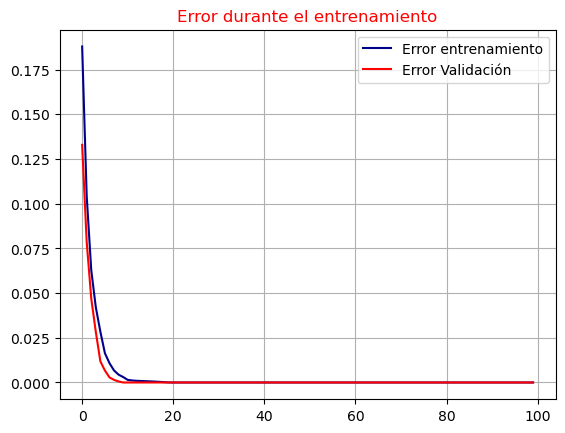

In [18]:
learning_rate=0.01
epocas=100

#Armamos el modelo con estructura 'Sequential'
model=models.Sequential()

#la primer capa recibe un numero solamente, usaremos sigmoide como función de activación para la clasificacion
binaria=layers.Dense(1, input_shape=(3,),use_bias=1,activation='hard_sigmoid') 
#armamos el modelo
model.add(binaria)


model.compile(optimizer=optimizers.RMSprop(lr=learning_rate), loss='binary_crossentropy', metrics="accuracy")

#por último traemos los datos de entrenamiento y los procesamos con 'fit()'
history=model.fit(X_train,y_train,validation_data=(X_val, y_val),epochs=epocas)

error=history.history['loss']
exac=history.history['val_loss']

acc_train=history.history['accuracy']
acc_test=history.history['val_accuracy']

epochs=np.arange(0,len(error))
plt.plot(epochs,error,label='Error entrenamiento',color='darkblue')
plt.plot(epochs,exac,label='Error Validación',color='r')
plt.legend()
plt.grid()
plt.title('Error durante el entrenamiento',color='red')

Accuracy durante el entrenamiento

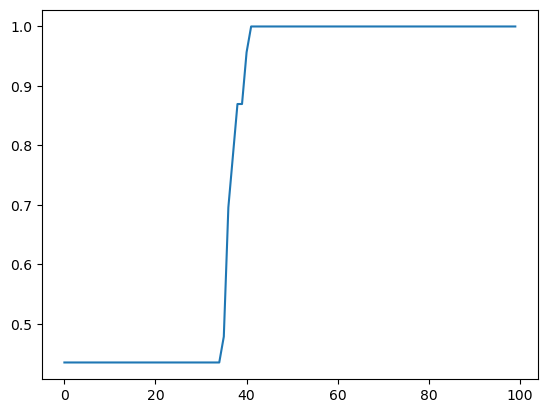

In [10]:
plt.plot(epochs,acc_test)

Finalmente evaluamos el modelo en el conjunto que reservamos

In [20]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

### Vemos cómo se separan las clases del conjunto original

In [21]:
col = np.where(clases==1,'darkblue',np.where(clases==0,'darkred','r'))

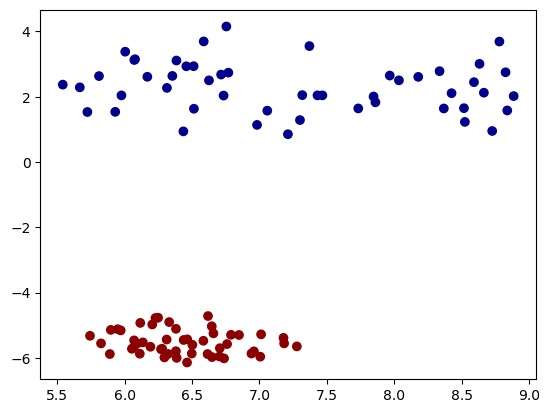

In [22]:
plt.scatter(features[:,0], features[:,2], c=col)

### Ahora la red

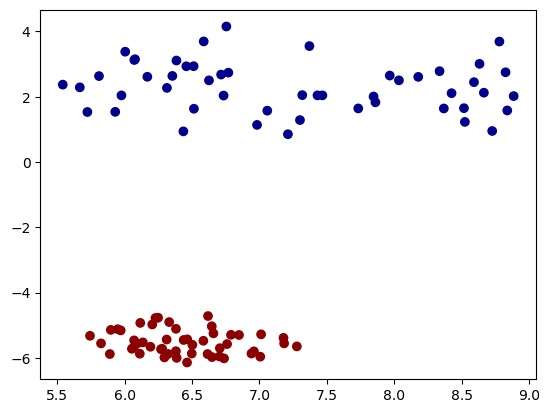

In [50]:
clases_predic=model.predict(features)
clases_predic=clases_predic.reshape(100,)

col_pred = np.where(clases_predic==1.,'darkblue',np.where(clases_predic==0.,'darkred','r'))

plt.scatter(features[:,0], features[:,2], c=col_pred)

In [51]:
model.save('binaria.h5')